Introduction to regression with neural networks

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
import numpy as np 
import sklearn as sk
print(tf.__version__)

2.9.2


what are regression problems?
- this generally involves predicting numbers 
- generally predicting
- in a neural network regression we are generally going to be modeling and predicting teh relationships bewteent eh dependent vaiables and independent variables (set number (data)) 

- we generally need inputs and outputs 
the input will be the independent variables that are known  
we need to  encode the independent variabbles into a neumerically encoded tensor
- often an algorithms that we feed the input data into is gnenrally already made 


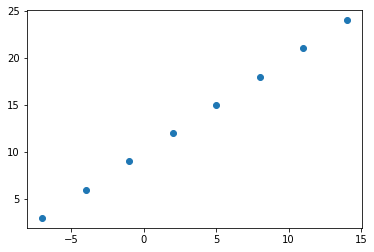

In [4]:
# first we will create the featuers 
X = np.array([-7.0, - 4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# creating lables (dependent variables)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualisation of this data isiong a scatter plot
plt.scatter(X,y)

In [5]:
# the relationship seen :
X + 10, y== X+10

(array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([ True,  True,  True,  True,  True,  True,  True,  True]))

input and output shapes of the model

In [6]:
# lets create a demo tensor for out housing problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

Metal device set to: 

2022-07-02 01:16:26.070412: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-02 01:16:26.070792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



notice the input shape is 3 and the output shape is 1 


In [7]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape 
# notice that the output is 8 and 8 because there are correlated with 8 differnet inputs 

((8,), (8,))

In [8]:
X[0], y[0]
# notcie that we are using X 0 to preduct Y 0 
#so we want to use one input feature to predct one output feature 
# we want to build a model that takes one X value to predicting one y value 

(-7.0, 3.0)

lets turn out numpy arrays into tensors


In [9]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y



(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

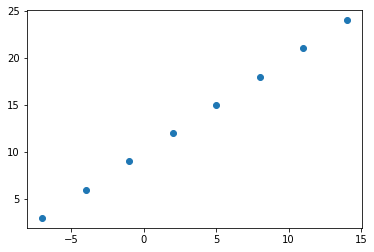

In [10]:
plt.scatter(X,y)

Steps in modeling 
- creating a model where we are defining the nput, output and hidden laters of a deep earning model 
- copiling  amodel and deifning the loss function(a function that tells out model how wrong out model is )
- the optimizer(tells out model how to improve our pattern)
- fitting a model- letting the model try and dind patterns between X and y (features and lables)



In [11]:
# first we need to set the seed 
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 


Epoch 1/5


2022-07-02 01:16:26.493997: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-02 01:16:26.670441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 186ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


the tf.keras.losses.MAE function is beased on teh application of the loss function withwhich easure sthe mean (abs(y_true  -y_pred), axis = -1).
we are calculating teh differnce bteween teh f=true value and the preducted value and getting the absoliuete value of themse 2 and generating a mean of that laong a specifc axis
on average how wrong are our preductions 
SGD - this is stochastic gradient descent which is used to optimize, so that we are using stochastic approximation for gradient descent optimization and generates preductive vlues to fill in data 

there are multiple ways to add layers to our model in tensorflow
we are able to use either:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1), 
])

or we can use the term:
model .add(tf.keras.layers.Dense(1)) where 1 is the number of layers 

In [12]:
# now we want to try and predict using using the model 
y_pred = model.predict([17.0])
y_pred
# our model realizes that there is a differnce of about + 11 in the y values so thus it is going to predict an addition of about 12 but this isnt quite accurate 

1/1 [==============================] - 0s 55ms/step


2022-07-02 01:16:26.815195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[12.716021]], dtype=float32)

In order to improve the model we need to:
- by adding more layers to the
- within each of teh hidden laeer we can change the actiavtion function of each layer 
- we could change the ptimization function or the lernaing rate of the optimization function
- when we are fitting the model we might increase the number of epochs which will allow the model to run more examples to learn from.


In tensorflow ther ear e2 differnet models we are able to use for generating predictions
- the smaller models use the SGD where as the larger models have more layers 
- the number of neurons in each layer is increased in larger models 
- larger models also use the Adam optimizer with an lr (learning rate) the higher the learning rate the more that the optimizer is pushig the model to learn, the lower the learning rate, teh smaller the steps the optimizer tells the model to take to improve 
- there is also a differnce in the subset in the smaller model but in the larger model uses X_train_full and y_train_full


In [13]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100


2022-07-02 01:16:27.012314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 141ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

In [14]:
X ,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# now lets predict again to see if the prediction has improved 
model.predict([17.0])

1/1 [==============================] - 0s 27ms/step


2022-07-02 01:16:27.607510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[30.158512]], dtype=float32)

now lets try and reqrite the code so that we are going to optimize with the addition of more code that will help improve the accuracy of the preduction
- lets try and add another layer  

In [16]:
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(2) # now we have 2 hidden layers of neurons 
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
with tf.device('/cpu:0'): model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

Epoch 1/100
1/1 [==============================] - 0s 139ms/step - loss: 12.9775 - mae: 12.9775


2022-07-02 01:16:27.786228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.9112 - mae: 12.9112
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7787 - mae: 12.7787
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7125 - mae: 12.7125
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 12.6462 - mae: 12.6462
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 12.5800 - mae: 12.5800
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 12.5137 - mae: 12.5137
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4475 - mae: 12.4475
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3812 - mae: 12.3812
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3150 - mae: 12.3150
Epoch 12/100
1/1 [==============================] - 0s 3ms

# Evaluating a model 
in practice a typical workflow youll go through when building neural networks:
- build a model
- fit it 
- evaluate it 
- tweak a model 
- fit it 
- evaluate it ... and repeate until we have met the desired outcome :)

when it comes to evaluation of out models we want to visualise our output with the desired output.
Generally we want to plot our data. this can go into the optimization of hyperparameters so that the predictions are as accurate across different input parameters for X
 


In [17]:
# lets make a bigger data set 
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
# lets make labes for the data set 
# we watnt eh pattern to learn this relationship that y = X +10
y = X+10
y 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

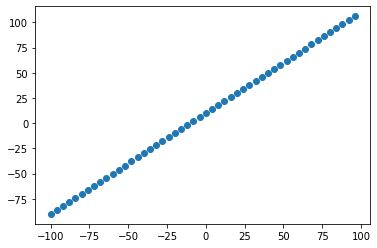

In [19]:
# now we want to visualise the data 
import matplotlib.pyplot as plt   
plt.scatter(X,y)

In [20]:
# before we visualise the training of the data we need to look into the theory of the 3 sets 
# the 3 sets refers to brekaing up the data into 3 differnet sets (training set, validation set, test set)
# you generally have a training set of data (70-80% of the data we have avalible ) - this is where we would tweak the model
# the vaidation set- is wher ewe are going to  


# 3 sets theory 
- Generally in machine learning we have 3 sets of data that we utilise in the model
- a training set where the model learns from this data which accounts for about 70-80% if teh ttal data you have avalible 
- a validation set -  the model gets tuned on this data, which is typically 10-15% of the data avalible
- there is also the test set which is typically 10-15% of the total data avalible  


In [21]:
# lets check the length of how many samples we have 
len(X)
# we shoul d genrally have a minimum of 100 in general for deep learning 

50

In [22]:
# lets split the data into training and test sets  
X_train  = X[:40] # this is 80% of the data 
X_test = X[40:] # this is the last 10
 
y_train = y[:40] # this is the first 40 that are dedicated to learning 
y_test = y[40:] # this the test set that contains teh last 10 values of the data set
len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

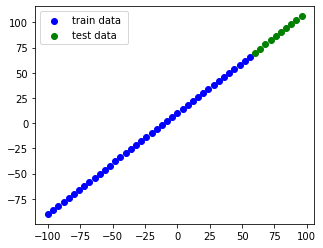

In [23]:
# now we want to visualise the data in the test sets 
plt.figure(figsize = (5,4)) # setting the figure size 
# we wnat to plot the training data in blue

plt.scatter(X_train, y_train, c= "b", label = "train data ") #plotting the training data in blue 
plt.scatter(X_test, y_test, c= "g", label= "test data ") #plotting the test data in green

plt.legend();

# Generating a model 

In [24]:
# now lets generate a model that is able to predict 
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(1)# now we have 2 hidden layers of neurons 
    ]) # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
#with tf.device('/cpu:0'): model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) # we need to use the with cup or the kernal will crash
# epochs refers to the number of runs 

In [25]:
# now lets generate a model that is able to predict 
# lets see if we can increase our current model by increaseing teh epochs to 100 
tf.random.set_seed(42)
# lets create a model using teh sequenctial API
with tf.device('/cpu:0'): model= tf.keras.Sequential([ #groups a linear stack of layers into a tf.keras.Model.
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
    # now we have 2 hidden layers of neurons 
    ], name = "model1") # this is basically saying that we want to generate a model from keras 
# now we want to compule the model 
model.compile(loss=tf.keras.losses.mae, # mae measn mean abouslue error, which is a measure of error between paired observations expressing the same phenomenon, compairson between preducted vs observed  )- 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# now we want to fit the model 
# epochs refers to the number of runs 


In [26]:
# we need to fit the data to 
model.fit(X_train, y_train, epochs = 100, verbose = 0)

2022-07-02 01:16:28.839725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
model.summary() 
# dense means fully connected layer in the neural network where the first layer is connected to the next layer ()
# the total params is the total number of parameters in the model- these are the parameters that the model is going to try and learn 
# the trainable params are the patterns that the model can update as it trains 
# the non trainable params arent updated during training - which is common when we bring in already learned patterns from other models in transfer learning 
# 


Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


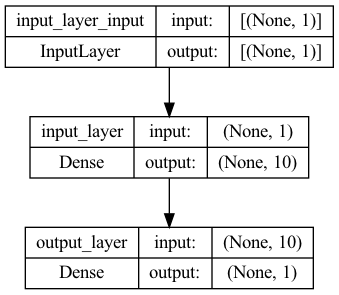

In [28]:
#if we want to plot a model we can use the tf.keras.plot_model function with the input parameters of model, 
tf.keras.utils.plot_model(model, show_shapes= True)

# Visualising model's predictions 

This can be done through the use of plotting the prediction against the true value 
- often we will see the y_test or y_true against the y_pred(the predcitions)


In [29]:
# we ware seeing the training data first 
y_pred = model.predict(X_test)
y_pred 


1/1 [==============================] - 0s 40ms/step


2022-07-02 01:16:30.551227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90309 ],
       [ 93.49081 ],
       [ 98.07854 ],
       [102.66627 ],
       [107.25398 ],
       [111.84171 ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [31]:
#plot redicitions function 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(7, 5))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

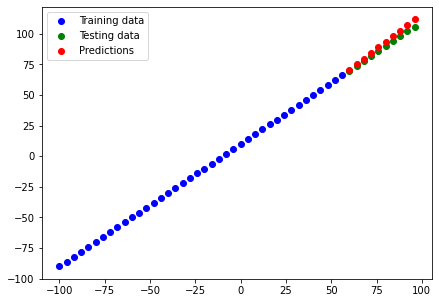

In [32]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating out models predictions with regression evaluation metrics 
- depending on teh problem there will be different evaluation metrics to evaluate your models prefomrance and since we are working on a regression, tow of the main metrics are :
- MAE- mean absolute error, which is the average of how wrong each of yhe models predictions are tf.keras.losses.MAE() or tf.metrics.mean_absolute_error() [generally a good starter metric for any regression problem]
- MSE- mean square error- which is the suqare of the average errors tf.keras.losses.MSE() or tf.metrics.mean_square_error(), []
- Huber  is a combination of MSE and MAE and less sensitive to outliers than MSE , tf,keras.losses.Huber()


In [33]:
# evaiuat the model on teh test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 3.1970 - mae: 3.1970


2022-07-02 01:16:30.982050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3.196950674057007, 3.196950674057007]

In [34]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247 , 14.116051 , 11.708945 , 10.336928 , 10.       ,
       10.698161 , 12.447123 , 15.3330145, 19.253983 , 23.841711 ],
      dtype=float32)>

In [35]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90309 ],
       [ 93.49081 ],
       [ 98.07854 ],
       [102.66627 ],
       [107.25398 ],
       [111.84171 ]], dtype=float32)>

In [36]:
# we need to squeeze y_pred
tf.squeeze(y_pred)

#notice that the shapes aer different so we are going to need to squeeze to remove an axis 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55219 ,  75.139915,  79.72764 ,  84.31536 ,  88.90309 ,
        93.49081 ,  98.07854 , 102.66627 , 107.25398 , 111.84171 ],
      dtype=float32)>

In [37]:
# now lets calcualte the new mean error again with the squeezed y_pred
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=tf.squeeze(y_pred))

mae

#the numpy output is 3.196... 
# this is the same as the MAE from the tests 



<tf.Tensor: shape=(), dtype=float32, numpy=3.1969507>

In [38]:
# lets calcualte the MSE 
mse =  tf.keras.losses.mean_squared_error(y_true=y_test, 
                                        y_pred=tf.squeeze(y_pred))
mse
# mse is generally hgiher than MAE becuase the errors are generally larger and thus the output is larger since it is the square, but helps in certain cases to use this over mae for smaller errors as it is squared 

<tf.Tensor: shape=(), dtype=float32, numpy=13.070209>

In [39]:
# make some functions to reuse MAE and MSE 
#MAE function
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true,
                                         y_pred= tf.squeeze(y_pred))
#MSE function
def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true,
                                         y_pred= tf.squeeze(y_pred)) 
    # automatically squeezing 
    
    

### Running experiments to improve our model 
- we can increase the size of the data set to train out model 

- we can make the model larger with increased number of neurons, more 
complex model, thi scna be in teh form of layers or in the form of hdden layers 

- train the model for longer to find patterns 

lets make 3 models:

model1 - that is the same as the origional moel, 1 layer, trained for 100 epochs 

model2- 2 layers , trained for 100 epochs 

model3 - 2 layers trained for 500 epochs 



In [40]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [41]:
#model1 
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
])

model_1.compile(loss =tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = "mae")
with tf.device('/cpu:0'): model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

2022-07-02 01:16:31.481583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 3ms/step - loss: 7.6617 - mae: 7.6617
Epoch 25/100
2/2 [==============================] - 0s 10ms/step - loss: 13.1859 - mae: 13.1859
Epoch 26/100
2/2 [==============================] - 0s 3ms/step - loss: 16.4211 - mae: 16.4211
Epoch 27/100
2/2 [==============================] - 0s 3ms/step - loss: 13.1660 - mae: 13.1660
Epoch 28/100
2/2 [==============================] - 0s 3ms/step - loss: 14.2559 - mae: 14.2559
Epoch 29/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0670 - mae: 10.0670
Epoch 30/100
2/2 [==============================] - 0s 3ms/step - loss: 16.3409 - mae: 16.3409
Epoch 31/100
2/2 [==============================] - 0s 3ms/step - loss: 23.6444 - mae: 23.6444
Epoch 32/100
2/2 [==============================] - 0s 3ms/step - loss: 7.6215 - mae: 7.6215
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3221 - mae: 9.3221
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - lo

1/1 [==============================] - 0s 27ms/step


2022-07-02 01:16:32.312902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


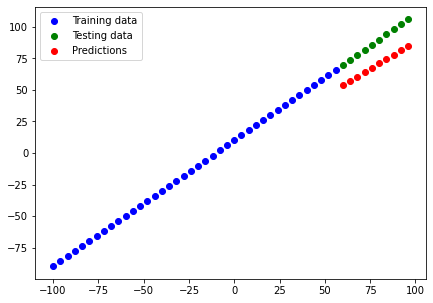

In [42]:
# now lets visualise the data and then 
# first make a prediction 
y_preds_1 = model_1.predict(X_test) # here we are making a prediction with the test data for X 
plot_predictions(predictions = y_preds_1)

In [43]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)
# notice that when we squeeze the tensor we are getting rid of the 2nd dimension 


(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [44]:
# now lets calculate the mae and mse values
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1,mse_1 
# automatically squeezed (defined in the helper function)

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745329>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### Model 2


In [45]:
#model_2
# contains 2 dense layers, trained for 100 epochs 
tf.random.set_seed(42) #setting the seed for reproduc

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss =tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(),
                metrics = "mse") # change to mse instead of mae 

with tf.device('/cpu:0'): model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mse: 1106.8031
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mse: 2586.0083
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

2022-07-02 01:16:32.682489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 3ms/step - loss: 12.6838 - mse: 233.2950
Epoch 26/100
2/2 [==============================] - 0s 3ms/step - loss: 26.1877 - mse: 1024.6094
Epoch 27/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7432 - mse: 194.8453
Epoch 28/100
2/2 [==============================] - 0s 4ms/step - loss: 22.8730 - mse: 835.6068
Epoch 29/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2459 - mse: 96.7787
Epoch 30/100
2/2 [==============================] - 0s 3ms/step - loss: 29.2641 - mse: 1535.1333
Epoch 31/100
2/2 [==============================] - 0s 3ms/step - loss: 53.0224 - mse: 5030.2939
Epoch 32/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9951 - mse: 211.7023
Epoch 33/100
2/2 [==============================] - 0s 3ms/step - loss: 15.6357 - mse: 337.3663
Epoch 34/100
2/2 [==============================] - 0s 3ms/step - loss: 12.6925 - mse: 214.4821
Epoch 35/100
2/2 [==============================] - 

1/1 [==============================] - 0s 29ms/step


2022-07-02 01:16:33.489414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


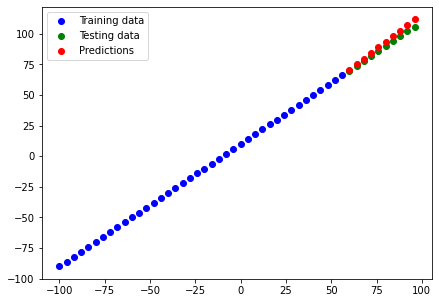

In [46]:
# lets make some predictions
y_preds_2 = model_2.predict(X_test) 
# now we want to plot our predictions 
plot_predictions(predictions = y_preds_2) #calling the plot predctions function
 

In [47]:
# now we want to calculate some predictions metrics 
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2,mse_2 

(<tf.Tensor: shape=(), dtype=float32, numpy=3.196946>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070178>)

## Model 3



In [48]:
# we want this model to have 500 epochs because we want it to run for longer 
# we also want it to have 2 layers 
tf.random.set_seed(42)

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mse"])

with tf.device('/cpu:0'): model_3.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 500)
# with tf.device('/cpu:0'): model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)



Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mse: 1106.8031
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mse: 2586.0083
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/500
2/2 [==========================

2022-07-02 01:16:33.812515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 3ms/step - loss: 26.1877 - mse: 1024.6094
Epoch 27/500
2/2 [==============================] - 0s 3ms/step - loss: 11.7432 - mse: 194.8453
Epoch 28/500
2/2 [==============================] - 0s 3ms/step - loss: 22.8730 - mse: 835.6068
Epoch 29/500
2/2 [==============================] - 0s 2ms/step - loss: 9.2459 - mse: 96.7787
Epoch 30/500
2/2 [==============================] - 0s 3ms/step - loss: 29.2641 - mse: 1535.1333
Epoch 31/500
2/2 [==============================] - 0s 2ms/step - loss: 53.0224 - mse: 5030.2939
Epoch 32/500
2/2 [==============================] - 0s 3ms/step - loss: 11.9951 - mse: 211.7023
Epoch 33/500
2/2 [==============================] - 0s 3ms/step - loss: 15.6357 - mse: 337.3663
Epoch 34/500
2/2 [==============================] - 0s 3ms/step - loss: 12.6925 - mse: 214.4821
Epoch 35/500
2/2 [==============================] - 0s 3ms/step - loss: 9.2398 - mse: 92.9126
Epoch 36/500
2/2 [==============================] - 0s

1/1 [==============================] - 0s 29ms/step


2022-07-02 01:16:37.694943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


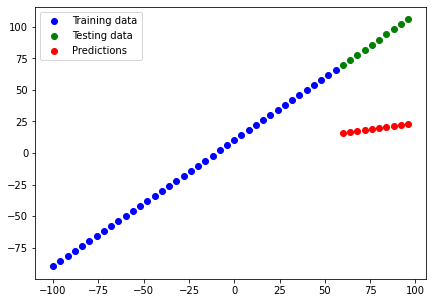

In [49]:
# lets visualise this 
y_preds_3 = model_3.predict(X_test)
y_preds_3

plot_predictions(predictions = y_preds_3)


In [50]:
# the output predictions are noticablly worse than the testing data 
#This is an example of overfitting in meahcine learning  whne the model has learned the training data too well and doesnt generalise very well to test data 
# lets run our evaluation metrics 
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

# Visualisation of the results 


In [51]:
#lets compare the reuslts across the different models with teh use of mandas dataframe 
import pandas as pd 
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()], 
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_resuts = pd.DataFrame(model_results, columns = ["model","mae","mse"])
all_resuts 


,model,mae,mse
0,model_1,18.745329,353.573364
1,model_2,3.196946,13.070178
2,model_3,68.713615,4808.027344


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


(None, None, None)

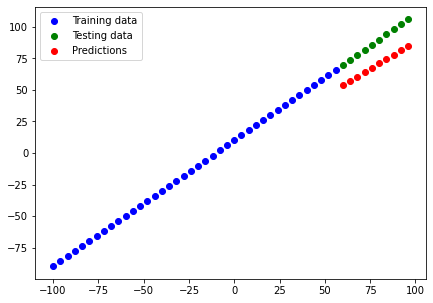

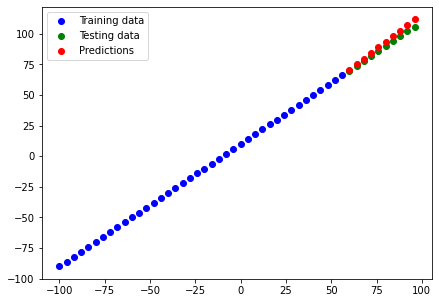

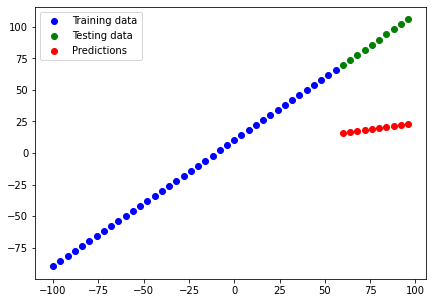

In [52]:
# from this we can see that model 2 had the best preformance 
model_2.summary()
plot_predictions(predictions = y_preds_1), plot_predictions(predictions = y_preds_2), plot_predictions(predictions = y_preds_3)

In [53]:
# saving our models 
# saving the models allows us to use them outside google colab like a moblie app
# we can use the function model.save() to save the model  to load a model we can use tf.keras.model.load_model to reuse them
# there ar e2 main formats we can use to save the model
# - the SavedModel format
# - the HDF5 format   
model_2.save("saved_model_2")


# sometimes we will need to save in a hdF5 format which is a universal data format. 
# when you use the .h5 in the filename will directily cause tf to save the model in a HDF5 format    
model_2.save("saved_model2_in_HDF5_format.h5")


INFO:tensorflow:Assets written to: saved_model_2/assets


In [56]:
#now lets load back in a saved model 
with tf.device('/cpu:0'): loaded_model2 = tf.keras.models.load_model("/Users/janadhi/tensorflow-test/saved_model_2")
loaded_model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
# now lets check if the loaded model is the same as the saved model
model_2_preds = model_2.predict(X_test)
loaded_model2_preds = loaded_model2.predict(X_test)
model_2_preds == loaded_model2_preds


1/1 [==============================] - 0s 26ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])